In [55]:
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

Création du nuage de mots pour **l'anglais**

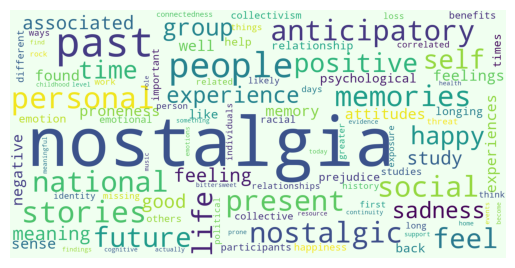

In [22]:
def filtering_en(file):
    with open(file, 'r', encoding='utf-8') as f:
        tokenizer = RegexpTokenizer("[a-z]{3,}")      # select only words, remove other symbols 
        tokens = tokenizer.tokenize(f.read())   # tokenize the whole text saved as one single string 
                                                # & return a list of tokens 
        sw = stopwords.words("english")   # yield a list of English stopwords
        new_sw = [
            'doi', 'oogle', 'google', 'research', 'often', 
            'also', 'ildschut', 'atcho','made','might', 'would','ostalgia',
            'ersonal', 'whether', 'example', 'owever', 'outledge','nticipatory','meekes',
            'researchers','edikides','toward','cholar','sychol','esearch','sychology',
            'among','much','heung','make','rump','says','even','makes','could','used',
            'rndt','page','text','many','ross','helps'
        ]                                 
        sw.extend(new_sw)               # add new stopwords to list
        filtered_list = [w for w in tokens if not w in sw and len(w) >=4]      
                                        # get complement: all tk - stopwords - tk < 4 = tk that we want

        fq = Counter(filtered_list)     # calculate word frequency in filtered list
        topwords = fq.most_common(100)  # select top 100 most frequent words for wordcloud making
                                        # return a list made up of tuples

        # define wordcloud
        wordcloud = WordCloud(
            background_color='honeydew',
            scale=4,
        )
        wordcloud.generate_from_frequencies(dict(topwords))     # topwords: list of tuples --> dict

        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

        wordcloud.to_file('./images/tab-tableaux/en.png')

filtering_en('./itrameur/contextes-eng.txt')


Ce script a pour but de traiter la tokenization du chinois et de faire les nuages de mots pour le chinois et l'anglais.  

J'utilise la librairie <font face="Fira Code" color=orange size=3>*jieba*</font> pour la tokenization des textes chinois à partir du fichier <font face="Fira Code" size=3 color=orange>*contextes-ch.txt*</font>. Les textes segmentés sont sauvegardés dans le fichier <font face="Fira Code" size=3 color=orange>*contextes-ch_seg.txt*</font>.  
Une fois que les textes chinois ont été segmentés, je crée ensuite un nuage de mots à partir de <font face="Fira Code" size=3 color=orange>*contextes-ch_seg.txt*</font>, en assignant un chemin de font à la variable <font face="Fira Code" size=3 color=orange>*font_path*</font> pour afficher correctement les sinogrammes.

In [27]:
with open('./itrameur/contextes-ch.txt', 'r', encoding='UTF-8') as fR:
    with open('./itrameur/contextes-ch_seg.txt', 'w', encoding='UTF-8') as fW:
        line = fR.read()    # open & read input file
        seg_list = jieba.cut(line, cut_all=False, HMM=True)   # tokenize
        fW.write(' '.join(seg_list))    # output file


['就是', '什么', '这个', '引用', '日期', '可以', '一个', '这样', '之间', '随着', '这些', '是一种', '因为', '作为', '之后', '一种', '不是', '这种', '对于', '以及', '义项', '百科', '科夫斯基', '已经', '最后', '方面', '编辑', '成为', '一样', '通过', '指出', '理论', '没有', '认为', '一部', '相关']


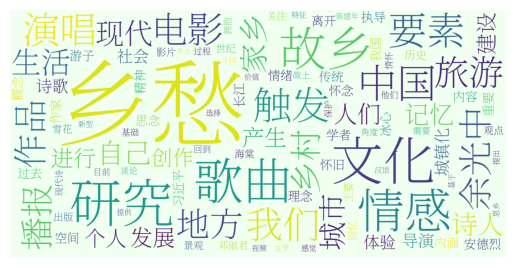

In [54]:
def FindTopTokens_ch(f_seg, f_sw):
    with open(f_seg, 'r', encoding='utf-8') as f_seg:
        tokenizer = RegexpTokenizer("[\u4e00-\u9fa5]{2,}")      # regexp: match Chinese characters (len >= 2)
        tokens = tokenizer.tokenize(f_seg.read())

        sw_list = []
        with open(f_sw, 'r', encoding='utf-8') as f_sw:
            for line in f_sw.readlines():
                line = line.strip()
                sw_list.append(line)
        print(sw_list)
        
        filtered_list = [w for w in tokens if not w in sw_list]
        
        fq = Counter(filtered_list)
        topwords = fq.most_common(100)
        
        # mask = np.array(Image.open('./mask_ch.png'))

        wc = WordCloud(
            background_color='honeydew',          
            font_path='/Users/ko/Library/Fonts/SourceHanSerif.ttc',
            scale=4
        )
        wc.generate_from_frequencies(dict(topwords))
 
        plt.imshow(wc)
        plt.axis('off')
        plt.show() # show photo

        wc.to_file  (#'./images/image-ch.png'
                    './images/tab-tableaux/ch.png'
                    )
    
FindTopTokens_ch(
    './itrameur/contextes-ch_seg.txt',
    './itrameur/mot-vide_ch.txt'
)

# collocations=False,
# random_state=3,
# contour_width=3,
# contour_color='red',
# max_words=90,
# mask=mask, 




In [ ]:
# script du prof
"""
import thulac
import errno
import fileinput

# autre possibilité, lancer la commande:
# python -m thulac chinois.txt chinois_seg_output.txt -seg_only
# Mais ne permet pas les redirections d'entrées/sorties

seg = thulac.thulac(seg_only=True)
try:
    for line in fileinput.input(files='chinois.txt'):
        print(seg.cut(line, text=True))
except IOError as e:
    if e.errno != errno.EPIPE:
        raise
"""